In [1]:
import os, torch, pickle 
from model import GPT, GPTConfig
from magicab import ETokenizer 

device = "cpu"
out_dir = "checkpoint/base"
ckpt_path = os.path.join(out_dir, 'ckpt.pt')
checkpoint = torch.load(ckpt_path, map_location=device)

# Load model 
model = GPT.load_model(checkpoint, device)

# Load tokenizer 

meta_path = os.path.join('data', checkpoint['config']['dataset'], 'meta.pkl')
with open(meta_path, 'rb') as f:
    meta = pickle.load(f)
tok = ETokenizer(char_vocab=meta['itos'])

number of parameters: 10.66M


/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_76837/2633557859.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_locati

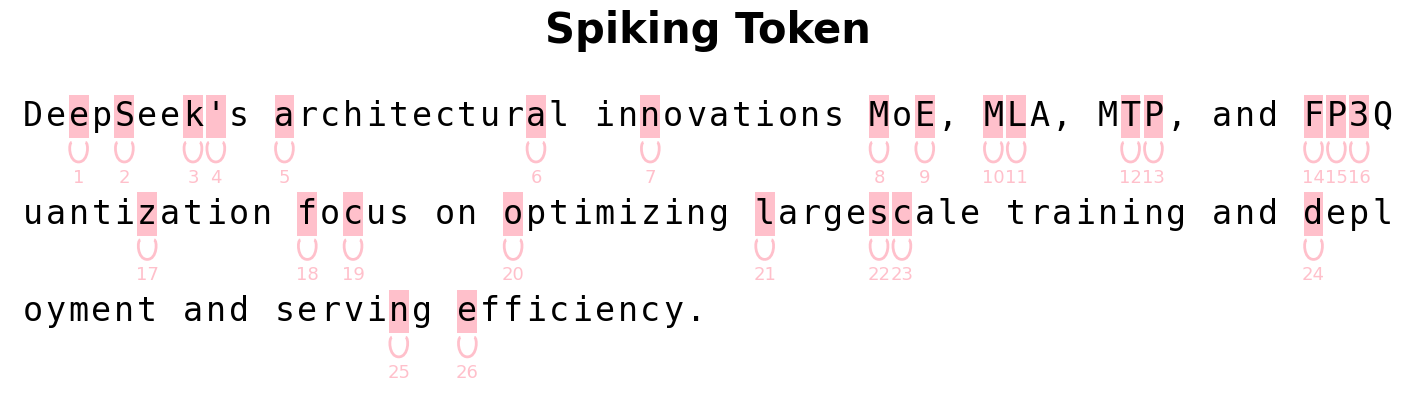

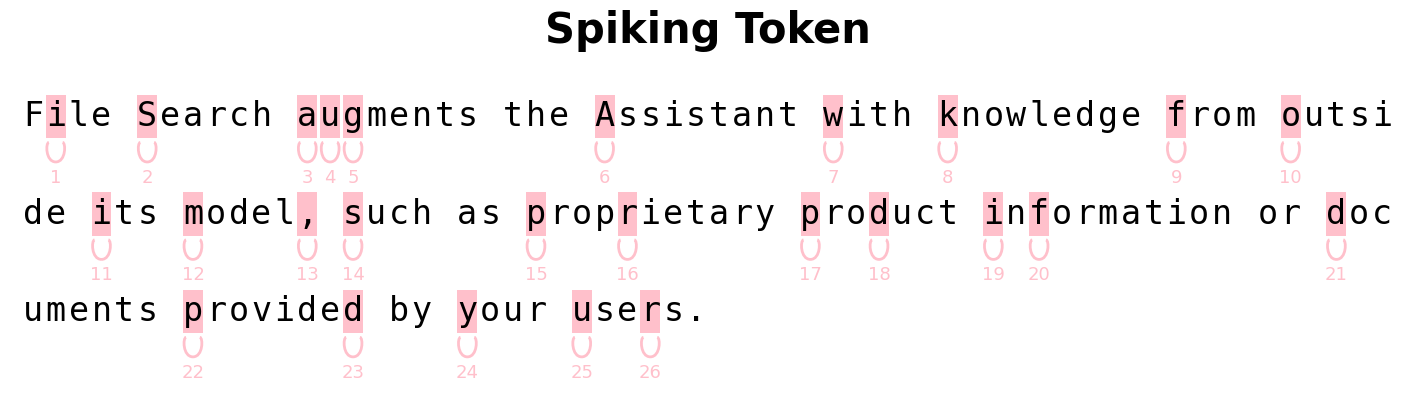

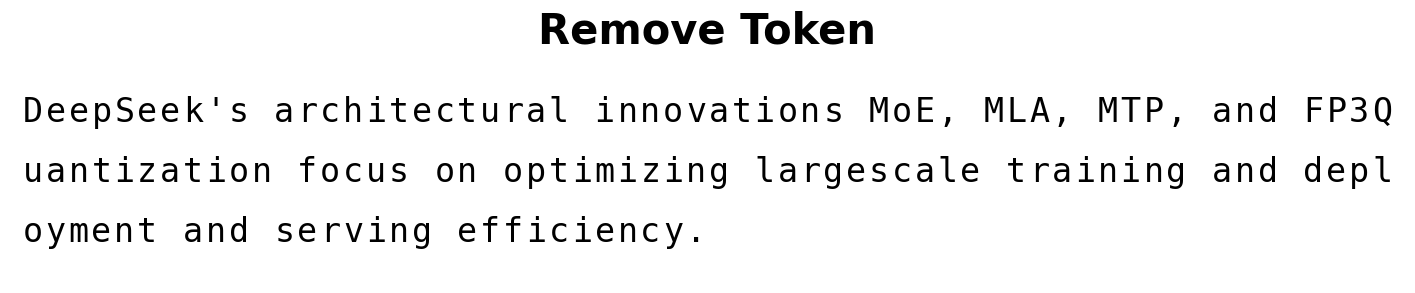

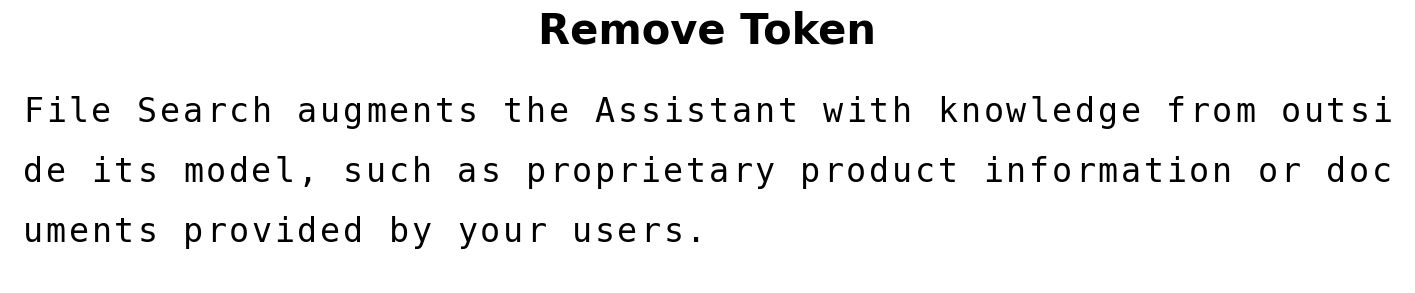

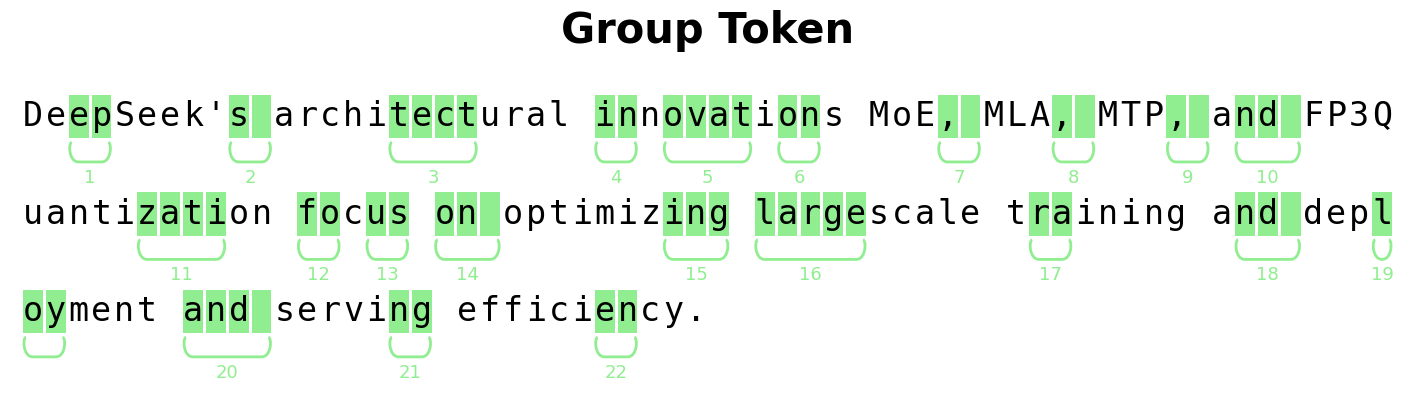

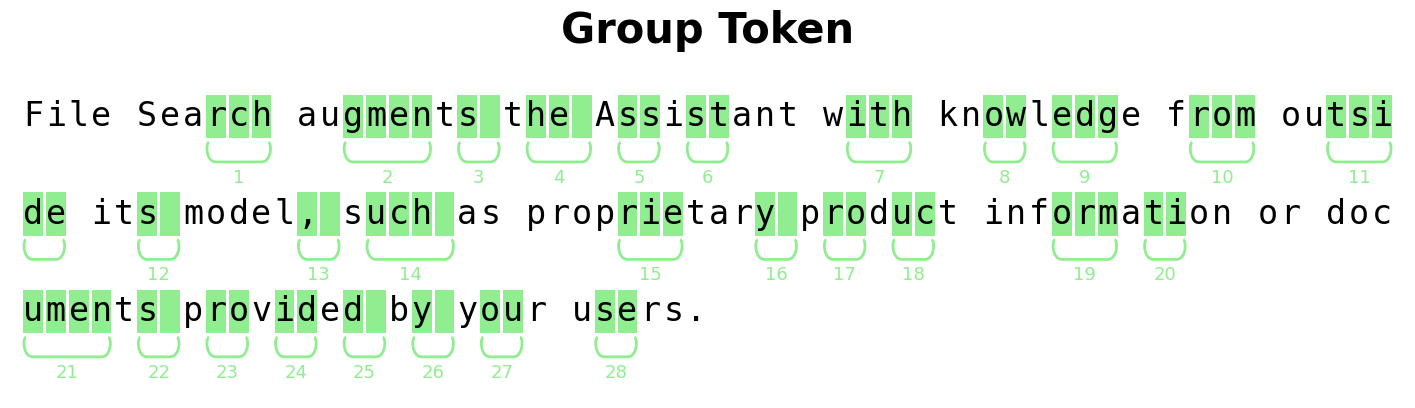

In [2]:
from magicab import Magicab
magicab = Magicab(model, tok, checkpoint_dir="checkpoint/base")

txt1 = "DeepSeek's architectural innovations MoE, MLA, MTP, and FP3Quantization focus on optimizing largescale training and deployment and serving efficiency."
txt2 = "File Search augments the Assistant with knowledge from outside its model, such as proprietary product information or documents provided by your users."
texts = [txt1, txt2]

# (a). Batch Visualizer
magicab.visualize_changes(texts) # issue: likely empty remove token groups leading to issue in map_to_char functional

In [5]:
# cache vocabulary change 
magicab.cache_vocab_change(texts)

# update vocabulary 
magicab.update_vocab()

 :: Add new token Dee  Id: 185
 :: Add new token See  Id: 186
 :: Add new token ral  Id: 187
 :: Add new token ral   Id: 188
 :: Add new token novati  Id: 189
 :: Add new token novation  Id: 190
 :: Add new token novations   Id: 191
 :: Add new token LA, M  Id: 192
 :: Add new token LA, MTP,   Id: 193
 :: Add new token Quan  Id: 194
 :: Add new token Quant  Id: 195
 :: Add new token Quanti  Id: 196
 :: Add new token s on   Id: 197
 :: Add new token pt  Id: 198
 :: Add new token pti  Id: 199
 :: Add new token ing   Id: 200
 :: Add new token ale  Id: 201
 :: Add new token ale   Id: 202
 :: Add new token  and   Id: 203
 :: Add new token ff  Id: 204
 :: Add new token ug  Id: 205
 :: Add new token t   Id: 206
 :: Add new token kno  Id: 207
 :: Add new token ge fro  Id: 208
 :: Add new token de  Id: 209
 :: Add new token mat  Id: 210
 :: Add new token mati  Id: 211
 :: Add new token oc  Id: 212
 :: Add new token ocu  Id: 213
 :: Add new token ed b  Id: 214
 :: Add new token your   Id: 215
 :

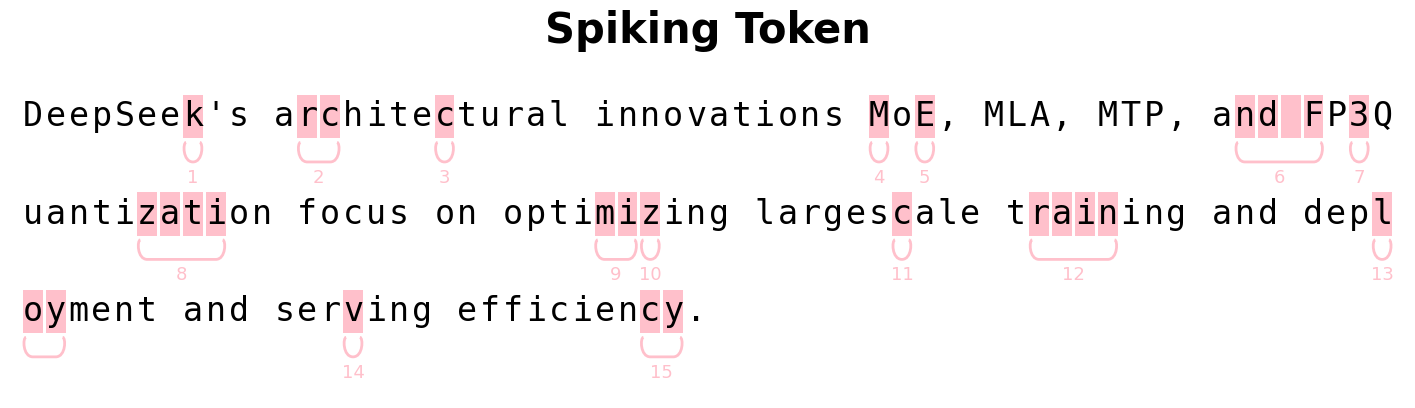

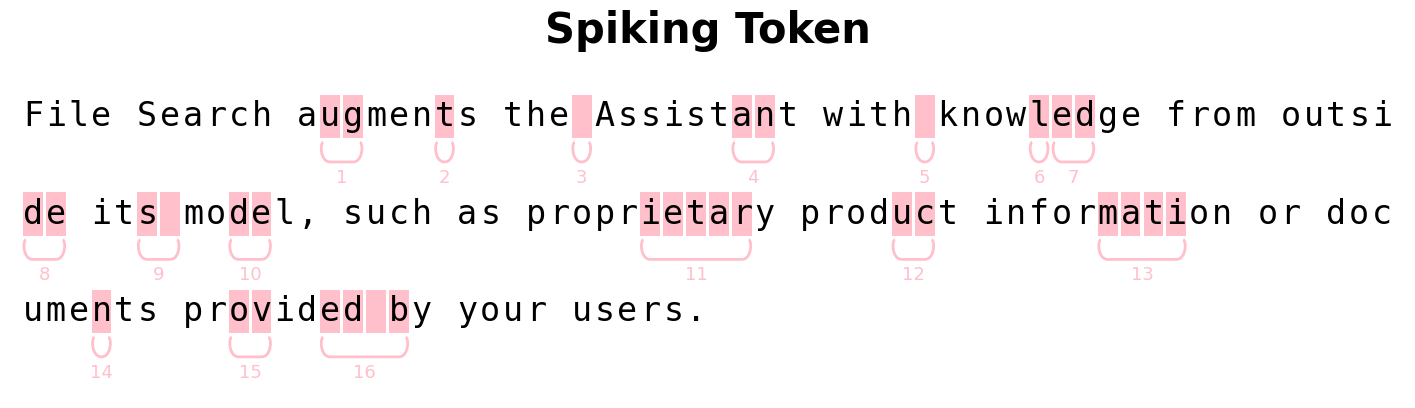

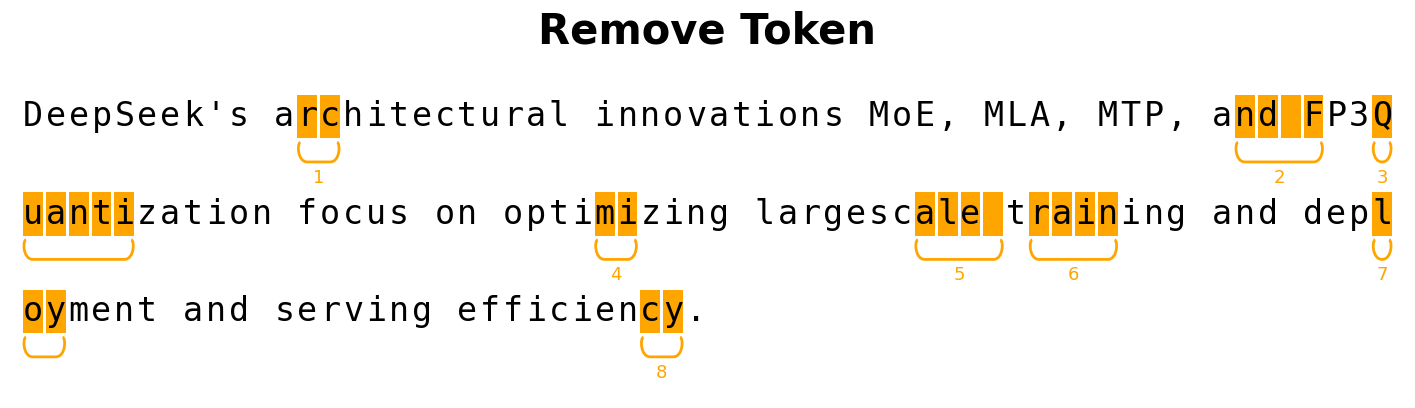

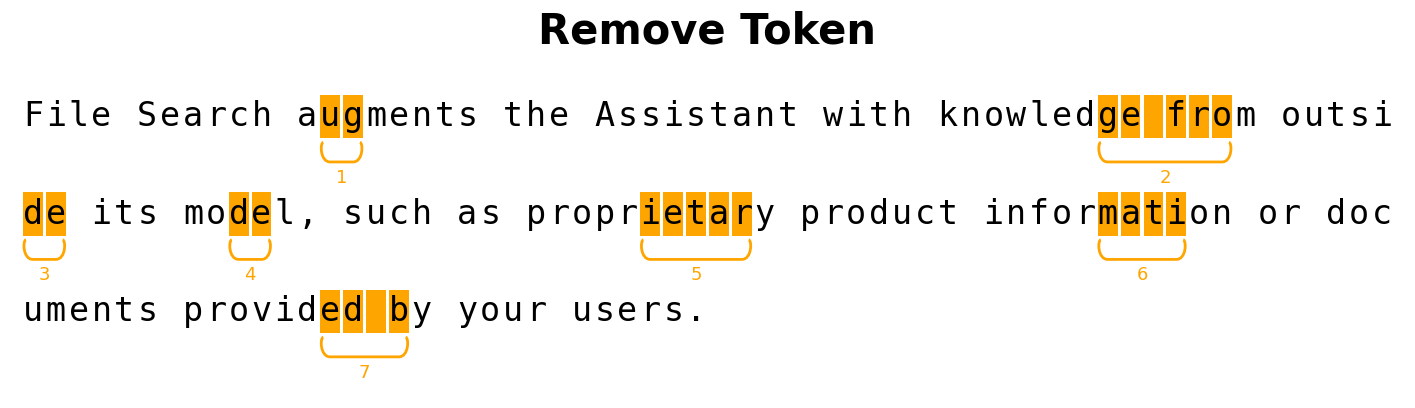

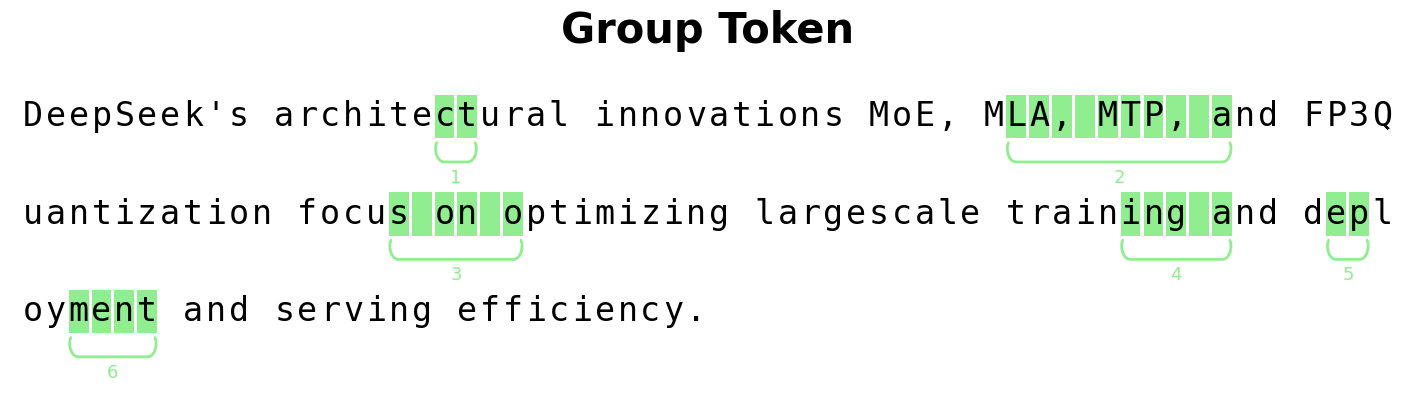

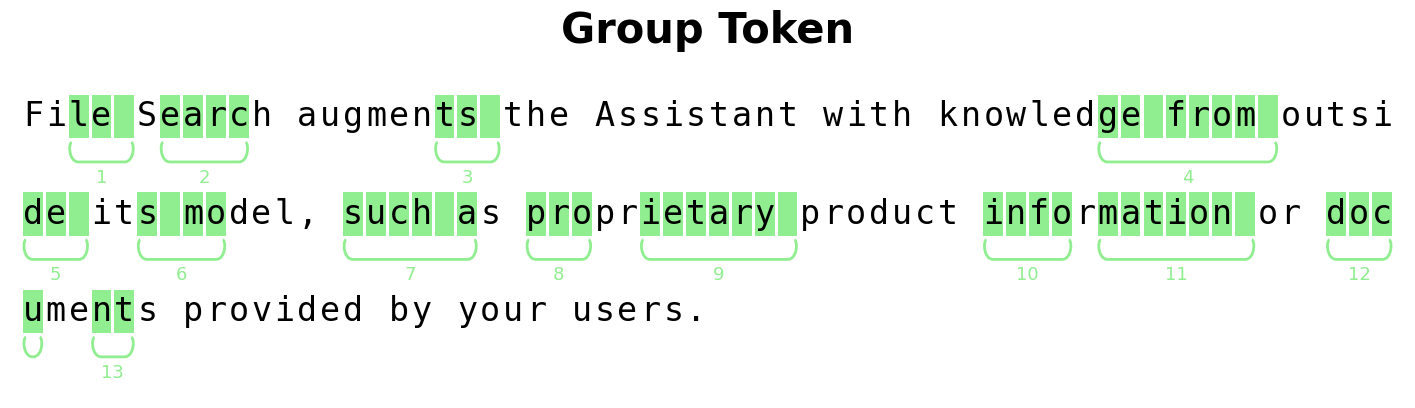

In [6]:
magicab.visualize_changes(texts) # issue: likely empty remove token groups leading to issue in map_to_char functional

In [7]:
from data.enwiki.util import prepare_enwiki_data

# Update data with tokenizer (11min --> 40s with rust tokenization)
prepare_enwiki_data(clean=True, tokenizer=magicab.tokenizer) # in-place update on trianing data 

Input file path:  data/enwiki/enwik8_clean.txt
Encoding data with tokenizer ...
Total tokens: 54482072
Vocab size: 677
train has 27,787,341 tokens
val has 1,101,538 tokens
test has 1,387,315 tokens


{'vocab_size': 677,
 'itos': {0: '\n',
  1: ' ',
  2: '!',
  3: '#',
  4: '$',
  5: '%',
  6: "'",
  7: '(',
  8: ')',
  9: '*',
  10: '+',
  11: ',',
  12: '-',
  13: '.',
  14: '/',
  15: '0',
  16: '1',
  17: '2',
  18: '3',
  19: '4',
  20: '5',
  21: '6',
  22: '7',
  23: '8',
  24: '9',
  25: ':',
  26: ';',
  27: '=',
  28: '?',
  29: '@',
  30: 'A',
  31: 'B',
  32: 'C',
  33: 'D',
  34: 'E',
  35: 'F',
  36: 'G',
  37: 'H',
  38: 'I',
  39: 'J',
  40: 'K',
  41: 'L',
  42: 'M',
  43: 'N',
  44: 'O',
  45: 'P',
  46: 'Q',
  47: 'R',
  48: 'S',
  49: 'T',
  50: 'U',
  51: 'V',
  52: 'W',
  53: 'X',
  54: 'Y',
  55: 'Z',
  56: '\\',
  57: '^',
  58: '_',
  59: '`',
  60: 'a',
  61: 'b',
  62: 'c',
  63: 'd',
  64: 'e',
  65: 'f',
  66: 'g',
  67: 'h',
  68: 'i',
  69: 'j',
  70: 'k',
  71: 'l',
  72: 'm',
  73: 'n',
  74: 'o',
  75: 'p',
  76: 'q',
  77: 'r',
  78: 's',
  79: 't',
  80: 'u',
  81: 'v',
  82: 'w',
  83: 'x',
  84: 'y',
  85: 'z',
  86: '{',
  87: '|',
  88: '}',
 

In [ ]:
import numpy as np 

data_dir = "data/enwiki/"



 :: Add new token se f  Id: 677
 :: Add new token se fi  Id: 678
 :: Add new token sed a  Id: 679
 :: Add new token sed again  Id: 680
 :: Add new token king   Id: 681
 :: Add new token s inclu  Id: 682
 :: Add new token ing the   Id: 683
 :: Add new token ers o  Id: 684
 :: Add new token ish Re  Id: 685
 :: Add new token lution and   Id: 686
 :: Add new token ul  Id: 687
 :: Add new token m is   Id: 688
 :: Add new token jora  Id: 689
 :: Add new token ibe    Id: 690
 :: Add new token act   Id: 691
 :: Add new token troy   Id: 692
 :: Add new token troy the   Id: 693
 :: Add new token gani  Id: 694
 :: Add new token tory   Id: 695
 :: Add new token e Co  Id: 696
 :: Add new token the f  Id: 697
 :: Add new token ols o  Id: 698
 :: Add new token ols of the   Id: 699
 :: Add new token ols of the    Id: 700
 :: Add new token ternation  Id: 701
 :: Add new token Confere  Id: 702
 :: Add new token ome for  Id: 703
 :: Add new token ome for   Id: 704
 :: Add new token ome for the   Id: 705


In [ ]:
self = magicab 
tokens_to_remove = list(self.token_removal.keys())
print(f":: Total {len(tokens_to_remove)} tokens to remove")

assert all([t in self.tokenizer.leaf_token_ids for t in tokens_to_remove]), "Should only remove leaf tokens!"

:: Total 16 tokens to remove


AssertionError: Should only remove leaf tokens!

In [28]:
self.tokenizer.leaf_token_ids

# Leaf token removal condition not met (!) --> check code

# As we add to vocabulary, leaf-token ids change (it's already a dynamic property), however, magicab.token_removal is static (!), switch to property !
assert all([t in self.tokenizer.leaf_token_ids for t in tokens_to_remove]), "Should only remove leaf tokens!"

AssertionError: Should only remove leaf tokens!

In [12]:
tokenizer = self.tokenizer 
from copy import deepcopy 

tmp_vocab = deepcopy(tokenizer.vocab)
tmp_merges = deepcopy(tokenizer.merges)
idx2pair = {k:v for (v, k) in tmp_merges.items()}

# remove tokens 
for token_id in tokens_to_remove: 
    print(f":: Removing token {tmp_vocab[token_id]} Id: {token_id}, splitting into sub-token pairs: {idx2pair[token_id]}")
    del tmp_vocab[token_id]
    del tmp_merges[idx2pair[token_id]]

# re-map token idx 
idx_map = {} 
for new_idx, old_idx in enumerate(tmp_vocab.keys()):
    idx_map[old_idx] = new_idx
    
# new vocab & merges | remark: update token tuple indices in merges
new_vocab = {idx_map[v]: k for v, k in tmp_vocab.items()}
# We have non-leaf node getting removed here
new_merges = {tuple([idx_map[id_tuple[0]], idx_map[id_tuple[1]]]): idx_map[k] for id_tuple, k in tmp_merges.items()}

:: Removing token rl Id: 105, splitting into sub-token pairs: (77, 71)
:: Removing token lud Id: 114, splitting into sub-token pairs: (113, 63)
:: Removing token cri Id: 149, splitting into sub-token pairs: (148, 68)
:: Removing token ef Id: 283, splitting into sub-token pairs: (64, 65)
:: Removing token el Id: 373, splitting into sub-token pairs: (64, 71)
:: Removing token f- Id: 197, splitting into sub-token pairs: (65, 12)
:: Removing token il Id: 275, splitting into sub-token pairs: (68, 71)
:: Removing token pec Id: 238, splitting into sub-token pairs: (169, 62)
:: Removing token xi Id: 277, splitting into sub-token pairs: (83, 68)
:: Removing token ard Id: 266, splitting into sub-token pairs: (265, 63)
:: Removing token ex Id: 301, splitting into sub-token pairs: (64, 83)
:: Removing token tra Id: 362, splitting into sub-token pairs: (152, 60)
:: Removing token 19 Id: 313, splitting into sub-token pairs: (16, 24)
:: Removing token ref Id: 314, splitting into sub-token pairs: (158

KeyError: 105

In [22]:
for id_tuple, k in tmp_merges.items(): 
    # to-be-remove token still exists in merges, it builds up other tokens through merges ...
    # issue with leaf-token detection once again
    print("New merge indices: ", idx_map[id_tuple[0]], idx_map[id_tuple[1]], "->", idx_map[k])

New merge indices:  62 67 -> 92
New merge indices:  66 68 -> 93
New merge indices:  78 1 -> 94
New merge indices:  74 65 -> 95
New merge indices:  95 1 -> 96
New merge indices:  78 64 -> 97
New merge indices:  77 78 -> 98
New merge indices:  98 79 -> 99
New merge indices:  80 78 -> 100
New merge indices:  100 64 -> 101
New merge indices:  66 60 -> 102
New merge indices:  102 68 -> 103
New merge indices:  103 73 -> 104
New merge indices:  74 77 -> 105
New merge indices:  68 73 -> 106
New merge indices:  106 66 -> 107
New merge indices:  60 78 -> 108
New merge indices:  108 78 -> 109
New merge indices:  63 68 -> 110
New merge indices:  60 71 -> 111
New merge indices:  71 80 -> 112
New merge indices:  67 64 -> 113
New merge indices:  64 77 -> 114
New merge indices:  65 1 -> 115
New merge indices:  66 71 -> 116
New merge indices:  116 68 -> 117
New merge indices:  117 78 -> 118
New merge indices:  118 67 -> 119
New merge indices:  47 64 -> 120
New merge indices:  74 71 -> 121
New merge ind

KeyError: 105

In [23]:
id_tuple

(60, 105)

In [18]:
tokens_to_remove

[105,
 114,
 149,
 283,
 373,
 197,
 275,
 238,
 277,
 266,
 301,
 362,
 313,
 314,
 349,
 175]

In [16]:
# new_vocab
tmp_vocab

{0: '\n',
 1: ' ',
 2: '!',
 3: '#',
 4: '$',
 5: '%',
 6: "'",
 7: '(',
 8: ')',
 9: '*',
 10: '+',
 11: ',',
 12: '-',
 13: '.',
 14: '/',
 15: '0',
 16: '1',
 17: '2',
 18: '3',
 19: '4',
 20: '5',
 21: '6',
 22: '7',
 23: '8',
 24: '9',
 25: ':',
 26: ';',
 27: '=',
 28: '?',
 29: '@',
 30: 'A',
 31: 'B',
 32: 'C',
 33: 'D',
 34: 'E',
 35: 'F',
 36: 'G',
 37: 'H',
 38: 'I',
 39: 'J',
 40: 'K',
 41: 'L',
 42: 'M',
 43: 'N',
 44: 'O',
 45: 'P',
 46: 'Q',
 47: 'R',
 48: 'S',
 49: 'T',
 50: 'U',
 51: 'V',
 52: 'W',
 53: 'X',
 54: 'Y',
 55: 'Z',
 56: '\\',
 57: '^',
 58: '_',
 59: '`',
 60: 'a',
 61: 'b',
 62: 'c',
 63: 'd',
 64: 'e',
 65: 'f',
 66: 'g',
 67: 'h',
 68: 'i',
 69: 'j',
 70: 'k',
 71: 'l',
 72: 'm',
 73: 'n',
 74: 'o',
 75: 'p',
 76: 'q',
 77: 'r',
 78: 's',
 79: 't',
 80: 'u',
 81: 'v',
 82: 'w',
 83: 'x',
 84: 'y',
 85: 'z',
 86: '{',
 87: '|',
 88: '}',
 89: '~',
 90: '<|endoftext|>',
 91: '<pad>',
 92: 'ch',
 93: 'gi',
 94: 's ',
 95: 'of',
 96: 'of ',
 97: 'se',
 98: 